In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt

from skimage import data

import numpy.linalg as LA
import scipy.linalg as la


mpl.rcParams["font.size"] = 18

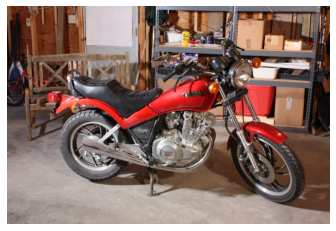

In [2]:
 
cycle_images = data.stereo_motorcycle()
image=cycle_images[0]
plt.imshow(image)
plt.axis("off")
plt.show()

In [3]:
image.shape


(500, 741, 3)

In [3]:
from sklearn.decomposition import PCA

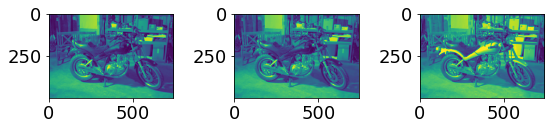

In [4]:
import numpy as np
red=np.zeros([500,741])
blue=np.zeros([500,741])
green=np.zeros([500,741])

green=image[:,:,0]
blue= image[:,:,1]
red=image[:,:,2]

fig, axes = plt.subplots(1, 3, figsize=(8, 4))
ax = axes.ravel()

 
ax[0].imshow(red)
ax[1].imshow(blue)
ax[2].imshow(green)

fig.tight_layout()

In [5]:
#initialize PCA with first 20 principal components
pca = PCA(50)
 
#Applying to red channel and then applying inverse transform to transformed array.
red_transformed = pca.fit_transform(red)
red_inverted = pca.inverse_transform(red_transformed)
 
#Applying to Green channel and then applying inverse transform to transformed array.
green_transformed = pca.fit_transform(green)
green_inverted = pca.inverse_transform(green_transformed)
 
#Applying to Blue channel and then applying inverse transform to transformed array.
blue_transformed = pca.fit_transform(blue)
blue_inverted = pca.inverse_transform(blue_transformed)

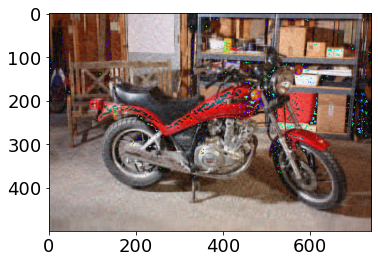

In [6]:
img_compressed = (np.dstack((green_inverted, blue_inverted, red_inverted))).astype(np.uint8)
plt.imshow(img_compressed)

In [7]:
def SVD(M, tol=1e-4, max_it=1000):
    # write your code here
    
    A = np.dot(M, M.T)
    H, Q = la.hessenberg(A,calc_q=True)
    I = np.eye(A.shape[0])
    U = Q
    B = H
    
    num_it = 0 # count the number of iterations of QR algorithm
    err = 1
    
    while err>tol:
        num_it +=1
        Q,R = la.qr(H)
        U = np.dot(U, Q)
        H = np.dot(R,Q)
        err = LA.norm(H - B, np.inf)
        B = H
      
        if num_it>max_it:
            print('The QR decomposition does not converge in %d iterations!' % max_it)
            break
    
    SVT = np.dot(U.T, M)
    return U, SVT

In [8]:
U1, SVT1 = SVD(green)

The QR decomposition does not converge in 1000 iterations!


# Attempting SVD in np.linalg library

Note in the following it already returns $V^T$, so there is no need to transpose anything

In [39]:
U_g, S_g, Vh_g = np.linalg.svd(green, full_matrices=False)

k=1000
S_g_reduced=np.zeros(len(S_g))
S_g_reduced[0:k]=S_g[0:k]
green_reduced=U_g@np.diag(S_g_reduced)@Vh_g

U_b, S_b, Vh_b = np.linalg.svd(blue, full_matrices=False)
S_b_reduced=np.zeros(len(S_b))
S_b_reduced[0:k]=S_b[0:k]
blue_reduced=U_b@np.diag(S_b_reduced)@Vh_b

U_r, S_r, Vh_r = np.linalg.svd(red, full_matrices=False)
S_r_reduced=np.zeros(len(S_r))
S_r_reduced[0:k]=S_r[0:k]
red_reduced=U_r@np.diag(S_r_reduced)@Vh_r


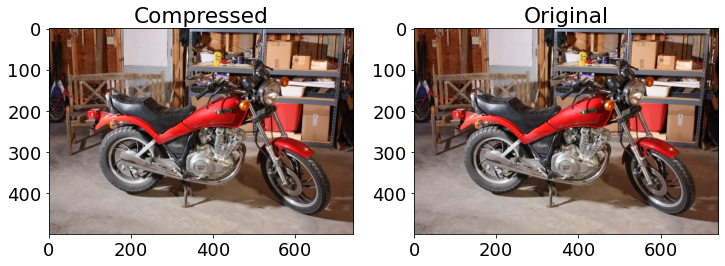

In [58]:
img_compressed = (np.dstack((green_reduced, blue_reduced, red_reduced))).astype(np.uint8)

fig, axes = plt.subplots(1, 2, figsize=(12, 9))
ax = axes.ravel()

 
ax[0].imshow(img_compressed, label='compressed')
ax[1].imshow(image, label='original')
ax[0].title.set_text('Compressed')
ax[1].title.set_text('Original')
plt.imshow(img_compressed)

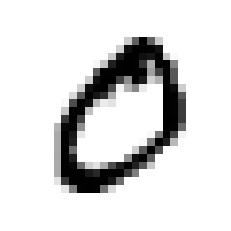

In [41]:
# Now I try again with the MNIST digit

A = np.load('image.npy')
plt.imshow(A, cmap="binary")
plt.axis("off")
plt.show()

Note the in the following application of the SVD to the array $A$ of the image, it considers the rank of $A$ to be full rank 28, because of numerical accuracy considerations.

So we should cut off the singular values in $S$ below a tolerance

In [45]:
U, S, Vt=np.linalg.svd(A, full_matrices=True)
print(S)

[1.82604972e+03 1.16318606e+03 9.03110174e+02 7.86608773e+02
 4.67954497e+02 4.29304155e+02 3.55810467e+02 1.97763283e+02
 1.51076021e+02 1.30820809e+02 8.48944705e+01 6.66724670e+01
 5.66659499e+01 4.68463941e+01 3.80078218e+01 2.56359511e+01
 2.06788193e+01 1.13614851e-13 1.10110988e-13 1.10110988e-13
 1.10110988e-13 1.10110988e-13 1.10110988e-13 1.10110988e-13
 1.10110988e-13 1.10110988e-13 1.10110988e-13 4.65066648e-14]


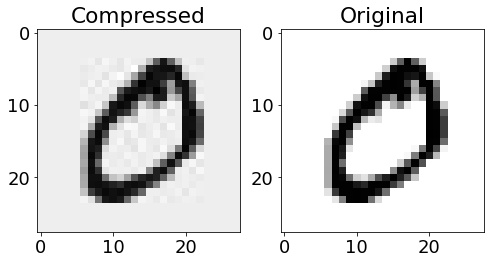

In [59]:
k=10
S_k=np.zeros(28)
S_k[0:k]=S[0:k]
A_k=U@np.diag(S_k)@Vt

fig, axes = plt.subplots(1, 2, figsize=(8, 4))
ax = axes.ravel()

 
ax[0].imshow(A_k, cmap='binary')
ax[1].imshow(A, cmap='binary')
ax[0].title.set_text('Compressed')
ax[1].title.set_text('Original')